In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
titanic =pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/titanic.csv?raw=true')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

<Axes: >

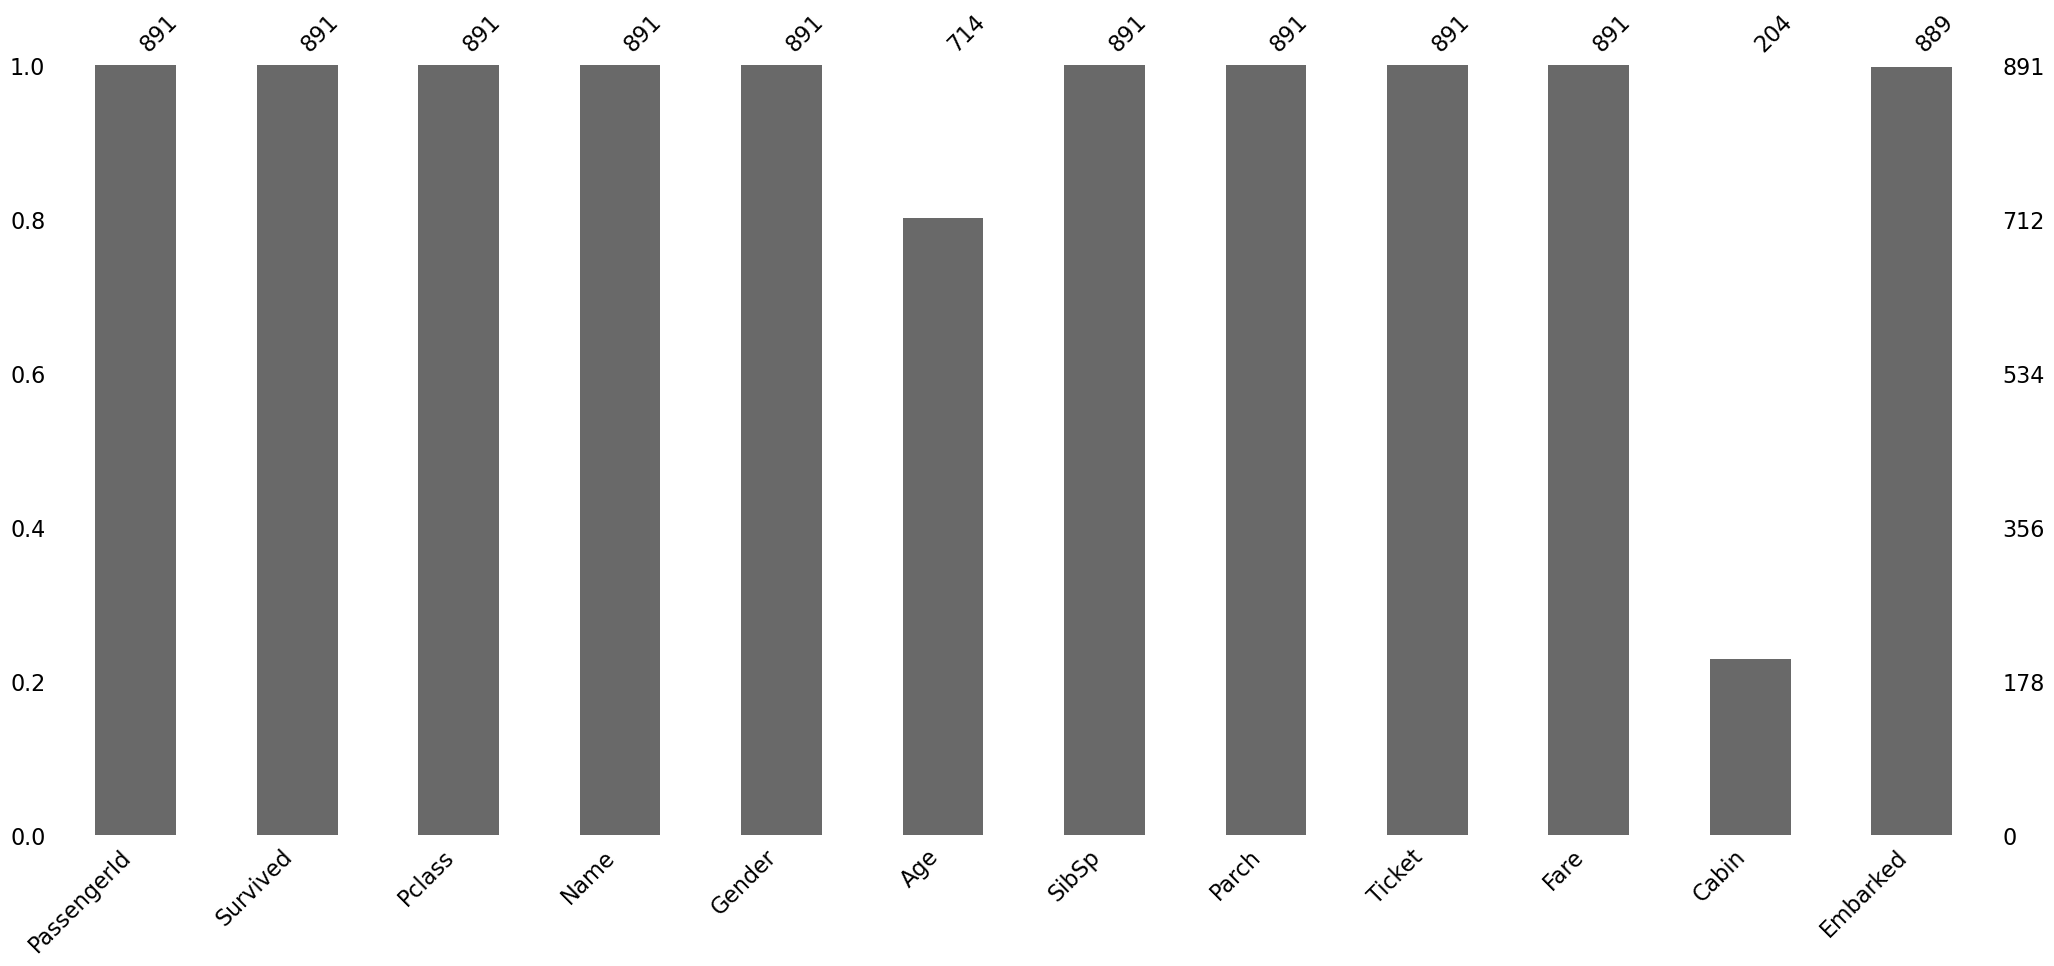

In [5]:
msno.bar(titanic)

<Axes: >

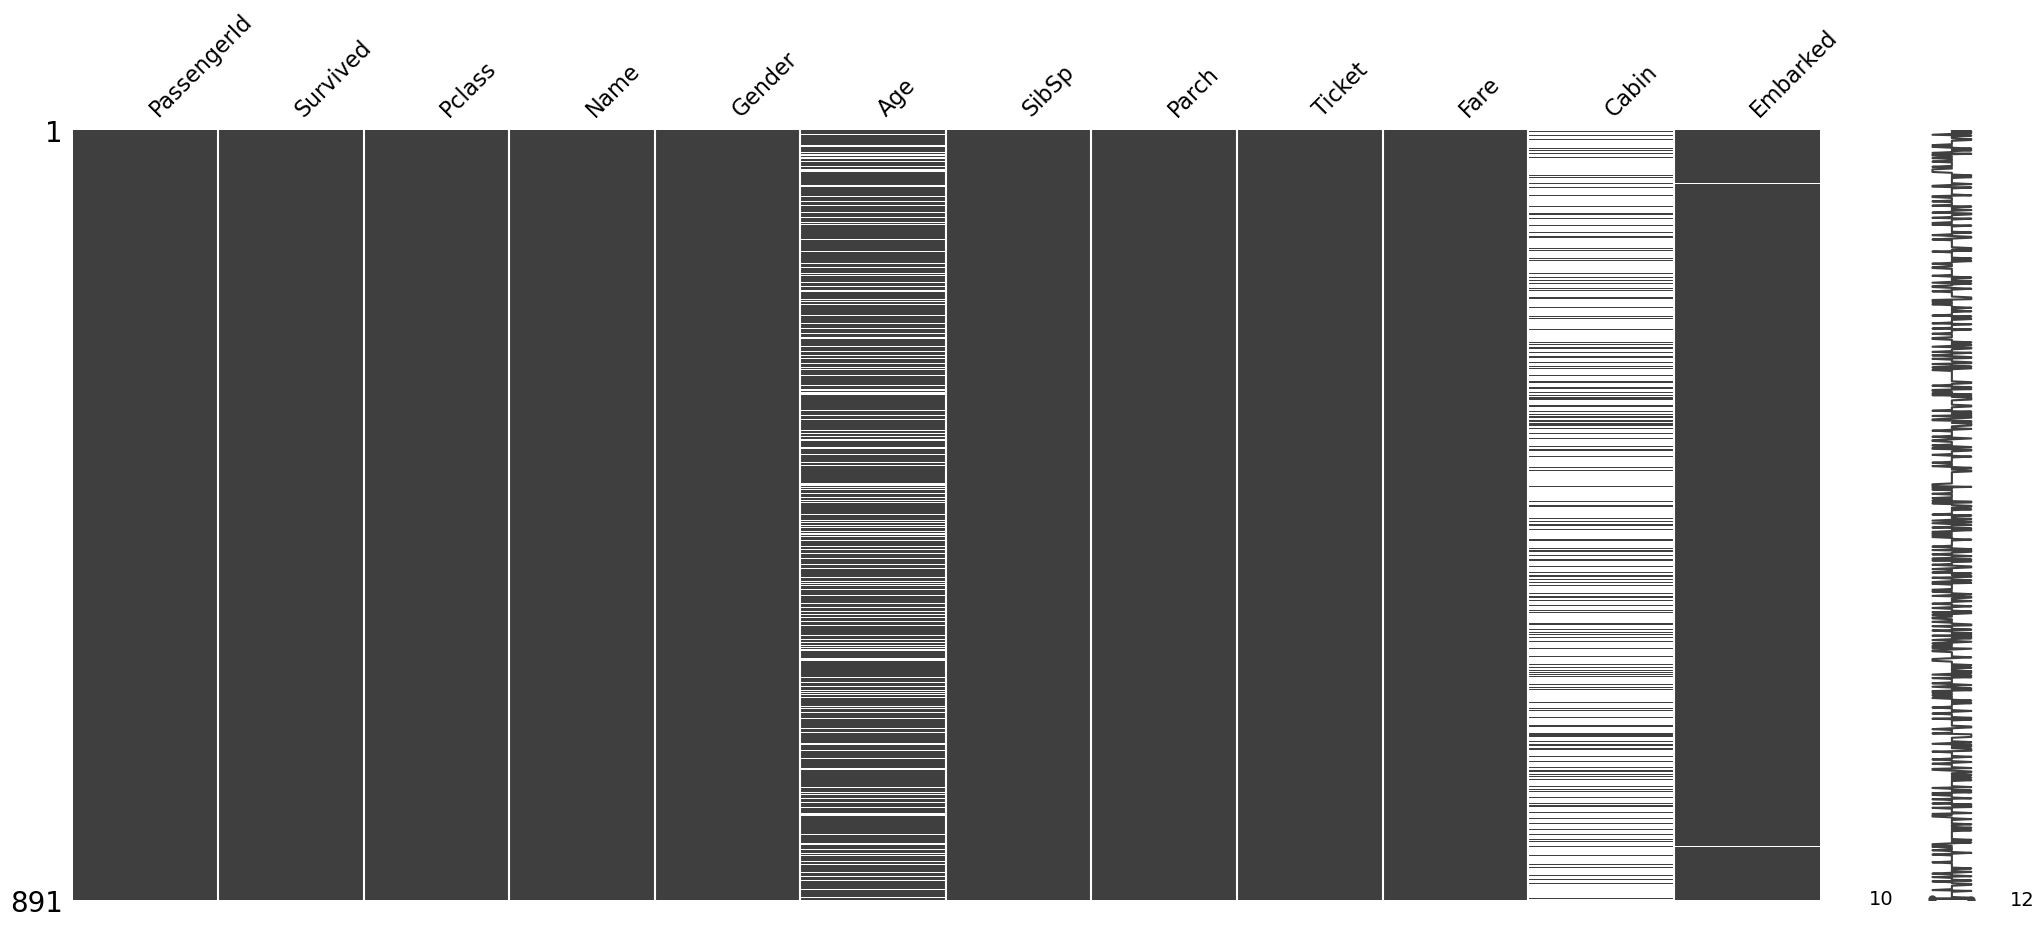

In [6]:
msno.matrix(titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

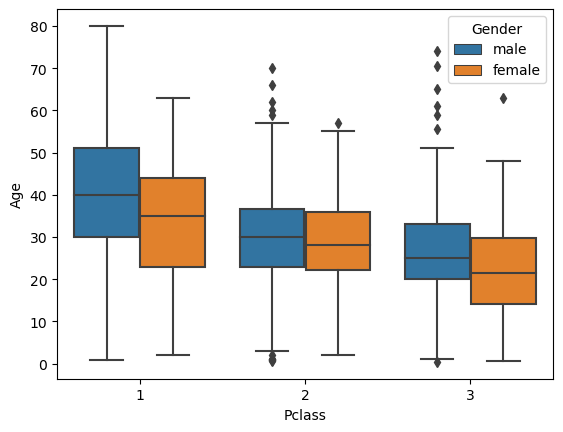

In [7]:
sns.boxplot(data=titanic,x='Pclass',y='Age',hue='Gender')

In [8]:
titanic.groupby(['Gender','Pclass']).median(numeric_only=True)

PassengerId  Survived   Age  SibSp  Parch      Fare
Gender Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500

In [9]:
def fillage(row):
    age=row[1]
    pclass=row[2]
    gender=row[0]
    if pd.isnull(age):
        if pclass==1:
            if gender=='male':
                return 40
            else:
                return 35
        elif pclass==2:
            if gender=='male':
                return 30
            else:
                return 28
        else:
            if gender=='male':
                return 25
            else:
                return 21
    else:
        return age
            

In [10]:
titanic['Age']=titanic[['Gender','Age',"Pclass"]].apply(fillage,axis=1)

In [11]:
def fill(cabin):
    if pd.isnull(cabin):
        return 0
    else:
        return 1

In [12]:
titanic['Cabin']=titanic['Cabin'].apply(fill)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
titanic['Gender']=label_encoder.fit_transform(titanic['Gender'])

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [15]:
titanic.dropna(inplace=True)
titanic.reset_index(drop=True,inplace=True)

In [16]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()

In [17]:
onehotencoder.fit(titanic[['Embarked']])

OneHotEncoder()

In [18]:
temp=onehotencoder.transform(titanic[['Embarked']]).toarray()

In [19]:
onehotencoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [20]:
temp_df=pd.DataFrame(temp,columns=['C','Q','S'],dtype='int')

In [21]:
titanic=pd.concat([titanic,temp_df],axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,0,0,1


In [23]:
titanic.drop(['Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [24]:
X=titanic.drop('Survived',axis=1)
y=titanic["Survived"]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [28]:
logistic_model.fit(X_train,Y_train)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = logistic_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(predictions,Y_test))

[[96 22]
 [11 49]]


In [33]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       118
           1       0.69      0.82      0.75        60

    accuracy                           0.81       178
   macro avg       0.79      0.82      0.80       178
weighted avg       0.83      0.81      0.82       178

